My old night-cleaning code - still testing it. It depends on spreadsheet. We need to confirm whether spreadsheet actually works identically to its old behavior. 

In [1]:
import atpy
import spread3 as sp
path = os.path.expanduser('~/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/')
path2= path+'spreadsheet/'

data = atpy.Table('{0}full_data_errorcorrected_ce.fits'.format(path))

from variability_script_perseus import test, calculate_stuff, glue_stuff

Auto-detected table type: fits
Hey, just a heads-up, this is an INTERACTIVE script.
 You should call the following functions:
 -test() # To make sure everything's working fine
         # before wasting a lot of time.
 -calculate_stuff() # To calculate stuff.
 -glue_stuff() # To glue together the calculated stuff.
               # Note, this one returns the spreadsheet.

New feature: you can pass a number to calculate_stuff() and glue_stuff()
(such as 25, 50, 100) as a manual control on how many chunks to split
the data into. Make sure to use the same number for both functions!!
Auto-detected table type: fits
('old data size is ', (113460, 22))


In [75]:
def calculate_stuff(data=data, splits=10, start=0):
    ''' 
    Runs the spreadsheet, first splitting it into `splits` 
    spreadsheets and then joining them. 
    
    '''
    
    if type(splits) is not int or type(start) is not int:
        raise TypeError

# We are going to split this into 10 smaller pieces through the magic of mod operations! woo.
    
    split_data = []
    spreadsheets = []

    for i in range(start, splits):
        data_i = data.where(data.SOURCEID % splits == i)
        
        split_data.append(data_i)
        
        lookup_i = sp.base_lookup(data_i)
        
        # The parameter "-1" is the season that tells data_cut not to make 
        # any cuts on the data.
        sp_i = sp.spreadsheet_write(data_i, lookup_i, -1, 
                                    path2+'sp%d.h5'%i, flags=256,
                                    per=False, graded=False, rob=True,
                                    colorslope=True)
        # EEEEE this is a flag to come and find this section of code
        
        try:
            now = datetime.datetime.strftime(datetime.datetime.now(),
                                             "%Y-%m-%d %H:%M:%S")
        except:
            now = 'sometime'
        print(("finished chunk %d at %s" % (i, now)))

In [76]:
import time
start = time.time()
calculate_stuff(data=data)
end = time.time()
print(f"elapsed time: {end-start:.1f}s aka {(end-start)/60:.1f}m")

Auto-detected table type: hdf5
Wrote output to /Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp0.h5
finished chunk 0 at sometime


/Users/tsrice/opt/anaconda3/lib/python3.7/importlib/__init__.py:127: H5pyDeprecationWarning: The h5py.highlevel module is deprecated, code should import directly from h5py, e.g. 'from h5py import File'.
  return _bootstrap._gcd_import(name[level:], package, level)


Auto-detected table type: hdf5
Wrote output to /Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp1.h5
finished chunk 1 at sometime
Auto-detected table type: hdf5
Wrote output to /Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp2.h5
finished chunk 2 at sometime
Auto-detected table type: hdf5
Wrote output to /Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp3.h5
finished chunk 3 at sometime
Auto-detected table type: hdf5
Wrote output to /Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp4.h5
finished chunk 4 at sometime
Auto-detected table type: hdf5
Wrote output to /Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp5.h5
finished chunk 5 at sometime
Auto-detected table type: hdf5
Wrote output to /Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp6.h5
finished chunk 6 at sometime
Auto-detected table type: hdf5
Wrote output to /Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp7.h5
finished chunk 7 at s

In [77]:
def glue_stuff( splits = 10, start=0 ):
    ''' Read in the tables from earlier and glue them together '''

    if type(splits) is not int:
        raise TypeError

    spread = atpy.Table(path2+'sp%d.h5' % start)
    
    spread_list = []
 
    for i in range(1+start,splits):
        other_spread = atpy.Table(path2+'sp%d.h5' %i )
        spread.append(other_spread) 
        
    return spread

In [78]:
glued_spreadsheet = glue_stuff()

Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp0.h5'>
  header = open(filename, 'rb').read(4)


Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp1.h5'>
  header = open(filename, 'rb').read(4)


Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp2.h5'>
  header = open(filename, 'rb').read(4)


Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp3.h5'>
  header = open(filename, 'rb').read(4)


Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp4.h5'>
  header = open(filename, 'rb').read(4)


Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp5.h5'>
  header = open(filename, 'rb').read(4)


Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp6.h5'>
  header = open(filename, 'rb').read(4)


Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp7.h5'>
  header = open(filename, 'rb').read(4)


Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp8.h5'>
  header = open(filename, 'rb').read(4)


Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Desktop/Bo_Tom/NGC1333/WSERV7/DATA/spreadsheet/sp9.h5'>
  header = open(filename, 'rb').read(4)


In [79]:
loaded_spreadsheet_path = os.path.expanduser("~/Desktop/Bo_Tom/NGC1333/WSERV7/")

loaded_spreadsheet = atpy.Table(loaded_spreadsheet_path+"DATA/spreadsheet/full_data_errorcorrected_ce_spreadsheet.fits")

Auto-detected table type: fits


In [80]:
loaded_spreadsheet

<Table name='SPREADSHEET' rows=21885 fields=153>

In [81]:
glued_spreadsheet.sort('SOURCEID')
loaded_spreadsheet.sort('SOURCEID')

In [91]:
np.allclose(glued_spreadsheet["j_meanr"], loaded_spreadsheet["j_meanr"])

True

In [100]:
np.allclose(glued_spreadsheet["k_meanr"], loaded_spreadsheet["k_meanr"])

True

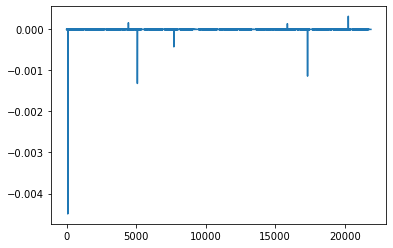

In [104]:
import matplotlib.pyplot as plt
plt.plot(glued_spreadsheet["h_meanr"] - loaded_spreadsheet["h_meanr"])

In [92]:
loaded_spreadsheet.columns

{
SOURCEID : type=>i8, 
Name : type=>i8, 
RA : type=>f8, unit=RADIANS, 
DEC : type=>f8, unit=RADIANS, 
N_j : type=>i8, 
N_h : type=>i8, 
N_k : type=>i8, 
pstar_mean : type=>f8, 
pstar_median : type=>f8, 
pstar_rms : type=>f8, 
Stetson : type=>f8, 
Stetson_choice : type=|S4, 
Stetson_N : type=>i8, 
j_mean : type=>f8, 
j_median : type=>f8, 
j_rms : type=>f8, 
j_min : type=>f8, 
j_max : type=>f8, 
j_range : type=>f8, 
j_rchi2 : type=>f8, 
j_err_mean : type=>f8, 
j_err_median : type=>f8, 
j_err_rms : type=>f8, 
j_err_min : type=>f8, 
j_err_max : type=>f8, 
j_err_range : type=>f8, 
j_meanr : type=>f8, 
j_medianr : type=>f8, 
j_rmsr : type=>f8, 
j_minr : type=>f8, 
j_maxr : type=>f8, 
j_ranger : type=>f8, 
j_err_meanr : type=>f8, 
j_err_medianr : type=>f8, 
j_err_rmsr : type=>f8, 
j_err_minr : type=>f8, 
j_err_maxr : type=>f8, 
j_err_ranger : type=>f8, 
h_mean : type=>f8, 
h_median : type=>f8, 
h_rms : type=>f8, 
h_min : type=>f8, 
h_max : type=>f8, 
h_range : type=>f8, 
h_rchi2 : type=>f8, 

In [93]:
np.allclose?

In [102]:
glued_spreadsheet

<Table name='spreadsheet' rows=21885 fields=153>

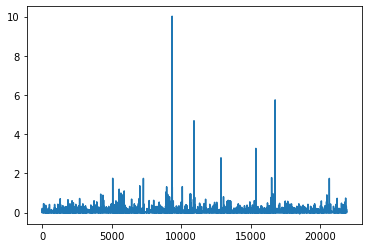

In [107]:
plt.plot(glued_spreadsheet["Stetson"] - loaded_spreadsheet["Stetson"])

In [109]:
print( np.median(glued_spreadsheet["Stetson"])) 
print(np.median(loaded_spreadsheet["Stetson"]))

0.025098904001036922
0.020729138720108925


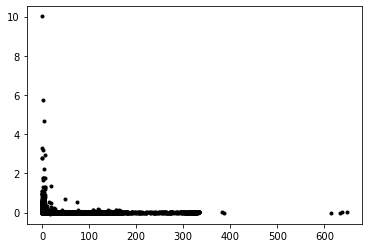

In [114]:
plt.plot(glued_spreadsheet['N_k'], glued_spreadsheet["Stetson"] - loaded_spreadsheet["Stetson"], 'k.')

In [111]:
glued_spreadsheet.columns

{
SOURCEID : type=int64, 
Name : type=int64, 
RA : type=float64, 
DEC : type=float64, 
N_j : type=int64, 
N_h : type=int64, 
N_k : type=int64, 
pstar_mean : type=float64, 
pstar_median : type=float64, 
pstar_rms : type=float64, 
Stetson : type=float64, 
Stetson_choice : type=|S4, 
Stetson_N : type=int64, 
j_mean : type=float64, 
j_median : type=float64, 
j_rms : type=float64, 
j_min : type=float64, 
j_max : type=float64, 
j_range : type=float64, 
j_rchi2 : type=float64, 
j_err_mean : type=float64, 
j_err_median : type=float64, 
j_err_rms : type=float64, 
j_err_min : type=float64, 
j_err_max : type=float64, 
j_err_range : type=float64, 
j_meanr : type=float64, 
j_medianr : type=float64, 
j_rmsr : type=float64, 
j_minr : type=float64, 
j_maxr : type=float64, 
j_ranger : type=float64, 
j_err_meanr : type=float64, 
j_err_medianr : type=float64, 
j_err_rmsr : type=float64, 
j_err_minr : type=float64, 
j_err_maxr : type=float64, 
j_err_ranger : type=float64, 
h_mean : type=float64, 
h_median